USE SKLEARN DIFFERENT MODLELS AND FIND ONE/ONES WITH BEST PERFORMANCE

In [1]:
import numpy as np
import pandas as pd
import math 
import sys
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
"""X_train = np.genfromtxt('data/train.csv',  delimiter=',')
X_train = X_train[1:,:-1]

Y_train = np.genfromtxt('data/train_result.csv',  delimiter=',')
Y_train = Y_train[1:,-1]

X_test = np.genfromtxt('data/test.csv',  delimiter=',')
X_test = X_test[1:,:-1]
"""
train_inputs = pd.read_csv("data/train.csv")
train_inputs = np.array(train_inputs)[:,:-1] 

train_labels = pd.read_csv("data/train_result.csv")
train_labels = np.array(train_labels)[:,1] 

test_inputs = pd.read_csv("data/test.csv")
test_inputs = np.array(test_inputs)[:,:-1] 



-Each Image is 1568 feature-long. 
-Each image contains 2 digits.
    - Representing a 56x28 pixel image 

-Each digit is a total of 784 pixel (i.e. 1568/2)
    - Representing a 28x28 pixel image 

    

In [ ]:
# Try displaying one image 
sampleImage = X_train[1,:]
print(sampleImage.shape)
fig = plt.figure
image = np.reshape(sampleImage, (28,56))
plt.imshow(image, cmap='gray_r')
plt.show()

Overview of label data. 
Labels go from 0 to 18 and we observe a bell-shaped (gaussian-like) distribution.

In [ ]:
# Class labels summary

# sns.countplot(Y_train)
from collections import Counter
print(Y_train.shape)
print(np.unique(Y_train))
c = Counter(Y_train)
plt.bar(c.keys(), c.values())
plt.show()

In [ ]:
# Stackoverflow suggested solution for one-hot encoding - Source : https://stackoverflow.com/questions/38592324/one-hot-encoding-using-numpy
@staticmethod
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

Y_onehot_train = get_one_hot(np.int_(Y_train), np.unique(Y_train).size)

In [ ]:
from sklearn import X ...

In [ ]:
# Distribution of predictions 
from collections import Counter
print(Y_pred_on_X_train.shape)
print(np.unique(Y_pred_on_X_train))
c = Counter(Y_pred_on_X_train)
plt.bar(c.keys(), c.values())
plt.show()

In [ ]:
# Show confusion matrix beautified
# Good result with 5000 iterations 
score = 1-errorRate
plt.figure(figsize=(15,15))
sns.heatmap(confmat, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);


In [3]:

def conf_matrix(testlabels, predlabels):

    n_classes = 19 
    matrix = np.zeros((n_classes,n_classes))
    

    for (test, pred) in zip(testlabels, predlabels):
        # ---> Write code here
        matrix[int(test)-1,int(pred)-1]+=1
    return matrix



In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_labels, test_size=0.30)

## SVM

In [20]:
import sklearn.svm as svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [ ]:
# STANDARDISATION 


In [12]:
# svm = svm.SVC()
# svm.fit(X_train,y_train)

svm1 = svm.SVC(kernel="rbf", C=5, gamma = 0.1)
svm1.fit(X_train,y_train)

# svm2 = svm.SVC(kernel="rbf", C=5, gamma = 0.05)
# svm2.fit(train_inputs, train_labels)


SVC(C=5, gamma=0.05)

In [13]:
svm2 = svm.SVC(kernel = 'poly')
svm2.fit(X_train,y_train)

SVC(kernel='poly')

In [14]:
svm3 = svm.SVC(kernel="sigmoid")
svm3.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [16]:
classes_pred_svm1 = svm1.predict(X_test)
classes_pred_svm2 = svm2.predict(X_test)
classes_pred_svm3 = svm3.predict(X_test)



In [18]:
def calculateError(classes_pred):
    # Confusion Matrix
    confmat = conf_matrix(y_test, classes_pred)
    # print('The confusion matrix is:')
    # plt.figure(figsize=(15,15))
    # sns.heatmap(confmat, annot=True, 
    #         linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

    # plt.ylabel('Actual label')
    # plt.xlabel('Predicted label')
            
    # Test error
    sum_preds = np.sum(confmat)
    sum_correct = np.sum(np.diag(confmat))
    print("The test error is ", round(100 * (1.0 - (float(sum_correct) / float(sum_preds))), 2), "%")



calculateError(classes_pred_svm1)
calculateError(classes_pred_svm2)
calculateError(classes_pred_svm3)


The test error is  55.43 %
The test error is  26.04 %
The test error is  93.5 %


In order : 

svm1 = svm.SVC(kernel="rbf", C=5, gamma = 0.05)
svm2 = svm.SVC(kernel="poly")
svm3 = svm.SVC(kernel="sigmoid")



The test error is  55.43 %
The test error is  26.04 %
The test error is  93.5 %

In [ ]:
## Pour soumettre 
classes_pred_SVM = svm.predict(test_inputs)

indexes = [x for x in range(10000)]
classes = classes_pred_SVM

df = pd.DataFrame({
    'Index': indexes,
    'Class': classes})


df.to_csv("classification_results/predSVM_1.csv",sep=",",index=False)

## NAIVES BAYES 

Sans aucune forme de pré-traitement, le classifieur Naive Bayes obtient un score de 7,39% seulement sur D_test.

In [54]:
gaussianClassifier = GaussianNB()
gaussianClassifier.fit(X_train, y_train)
pred_test = gaussianClassifier.predict(X_test)
print(accuracy_score(y_test, pred_test)*100)

7.3999999999999995


Pour réduire le nombre de features que doit apprendre le Naive Bayes, on va faire une PCA en premier. 

On va essayer de trouver le parametre optimal d'une PCA, suivi d'un classifieur Bayes naif.
Pour PCA, il s'agit de savoir combien de composantes principales garder, pour generer la meilleure prediction par Naive Bayes.

On peut regrouper la procédure (PCA ensuite Bayes) dans un pipeline sklearn.

In [58]:
# Fit to training data and predict on test data (PCA + Naive Bayes)
PCA_NaiveBayes = make_pipeline(PCA(n_components=25), GaussianNB())
PCA_NaiveBayes.fit(X_train, y_train)
pred_test = PCA_NaiveBayes.predict(X_test)
print(accuracy_score(y_test, pred_test)*100)


22.433333333333334


In [59]:
max_components_to_test = 250
kComponents = [k+1 for k in range(max_components_to_test)]
def findBestNumberComponentsForPCA_NaiveBayes() : 
    accuracyArr = []

    bestParameter = -1
    bestAccuracy = -1
    for k in kComponents : 
        # Fit to training data and predict on test data (PCA with k components + Naive Bayes)
        PCA_NaiveBayes = make_pipeline(PCA(n_components=k), GaussianNB())
        PCA_NaiveBayes.fit(X_train, y_train)
        pred_test = PCA_NaiveBayes.predict(X_test)
        accuracy = accuracy_score(y_test, pred_test)*100
        if k%10 ==0 : print(f'Accuracy for PCA with {k} components is : {accuracy}%')
        accuracyArr.append(accuracy)
        if accuracy>bestAccuracy :
            bestAccuracy = accuracy
            bestParameter = k

    return bestParameter, bestAccuracy, accuracyArr

In [60]:
bestParameter, bestAccuracy, accuracyArr = findBestNumberComponentsForPCA_NaiveBayes()

Accuracy for PCA with 10 components is : 19.433333333333334%
Accuracy for PCA with 20 components is : 22.366666666666667%
Accuracy for PCA with 30 components is : 22.653333333333332%
Accuracy for PCA with 40 components is : 23.186666666666667%
Accuracy for PCA with 50 components is : 23.253333333333334%
Accuracy for PCA with 60 components is : 23.24%
Accuracy for PCA with 70 components is : 22.953333333333333%
Accuracy for PCA with 80 components is : 22.926666666666666%
Accuracy for PCA with 90 components is : 22.54%
Accuracy for PCA with 100 components is : 22.486666666666665%
Accuracy for PCA with 110 components is : 22.14%
Accuracy for PCA with 120 components is : 21.8%
Accuracy for PCA with 130 components is : 21.6%
Accuracy for PCA with 140 components is : 21.28666666666667%
Accuracy for PCA with 150 components is : 20.713333333333335%
Accuracy for PCA with 160 components is : 20.8%
Accuracy for PCA with 170 components is : 20.62%
Accuracy for PCA with 180 components is : 20.38666

On constate que la précision du classifieur Naive Bayes va en augmentant jusqu'à un certain seuil, au delà duquel la précision du classifieur diminue graduellement. 

Le nombre optimal de Composantes Principales à utiliser ici avec Naive Bayes est X, et cela permet un score de X%.

Number of Principal Components that generated the best prediction with Naive Bayes : 64
Accuracy : 23.56


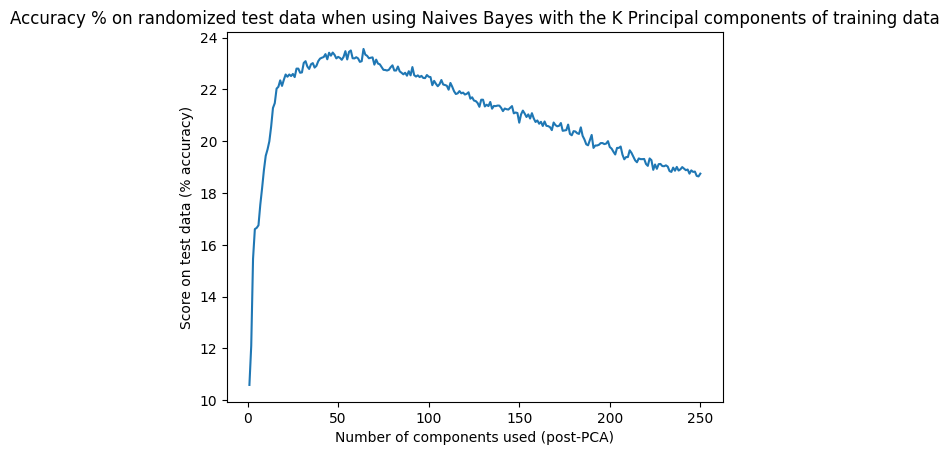

In [67]:
print(f'Number of Principal Components that generated the best prediction with Naive Bayes : {bestParameter}')
print(f'Accuracy : {bestAccuracy}')

plt.plot(kComponents, accuracyArr)
plt.title('Accuracy % on randomized test data when using Naives Bayes with the K Principal components of training data')
plt.xlabel('Number of components used (post-PCA)')
plt.ylabel('Score on test data (% accuracy)')
plt.show()

## Neural-Network
https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/

https://victorzhou.com/blog/keras-cnn-tutorial/

https://keras.io/examples/vision/mnist_convnet/ # 99% accuracy

In [94]:
# import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

In [75]:
# Convert to "one-hot" vectors using the to_categorical function
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_labels, test_size=0.30)
print("First 5 training labels:\n", y_train[:5])

num_classes = 19
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables:
 [ 5  9  8  7 14]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [95]:
# Initialize Neural Network and add layers to it. 
model = Sequential()
# model.add(Flatten(input_shape=(28,28)))

#Layer 1
p = X_train.shape[1] # 1568
model.add(Dense(1024, input_shape=(p,))) 
model.add(Activation('relu')) # Rectified linear unit 
model.add(Dropout(0.1)) # randomly deactivate some nodes to avoid overfitting 

#Layer 2
#number of neurons 
numberNeuronsLayer2 = int(math.sqrt(1024 * 512)) # regle de pouce
model.add(Dense(numberNeuronsLayer2))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#Layer 3   
numberNeuronsLayer3 = int(math.sqrt(512 * 256)) 
model.add(Dense(numberNeuronsLayer3))
model.add(Activation('relu'))
model.add(Dropout(0.1))


#Layer 4   
numberNeuronsLayer4 = 128
model.add(Dense(numberNeuronsLayer4))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#Layer 5
numberNeuronsLayer5 = 64
model.add(Dense(numberNeuronsLayer5))
model.add(Activation('relu'))
model.add(Dropout(0.1))


#Final layer 
model.add(Dense(num_classes, activation='softmax'))


In [96]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              1606656   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 724)               742100    
                                                                 
 activation_1 (Activation)   (None, 724)               0         
                                                                 
 dropout_1 (Dropout)         (None, 724)               0         
                                                                 
 dense_12 (Dense)            (None, 362)              

In [100]:
# model.fit(X_train, y_train, epochs=5, 
#           validation_data=(X_test,y_test))


# training = model.fit(X_train, y_train,
#           batch_size=128, epochs=1000,
#           verbose=1)

training = model.fit(X_train, y_train,
          batch_size=128, epochs=200,
          verbose=1, validation_data=(X_test,y_test))

Epoch 1/200
274/274 [==============================] - 6s 21ms/step - loss: 0.0940 - acc: 0.9725 - val_loss: 0.4130 - val_acc: 0.9119
Epoch 2/200
274/274 [==============================] - 6s 21ms/step - loss: 0.0944 - acc: 0.9740 - val_loss: 0.4079 - val_acc: 0.9171
Epoch 3/200
274/274 [==============================] - 6s 20ms/step - loss: 0.0942 - acc: 0.9737 - val_loss: 0.3872 - val_acc: 0.9158
Epoch 4/200
274/274 [==============================] - 6s 21ms/step - loss: 0.0872 - acc: 0.9749 - val_loss: 0.3990 - val_acc: 0.9140
Epoch 5/200
274/274 [==============================] - 6s 21ms/step - loss: 0.0775 - acc: 0.9768 - val_loss: 0.3981 - val_acc: 0.9171
Epoch 6/200
274/274 [==============================] - 6s 21ms/step - loss: 0.0800 - acc: 0.9776 - val_loss: 0.4203 - val_acc: 0.9166
Epoch 7/200
274/274 [==============================] - 6s 21ms/step - loss: 0.0719 - acc: 0.9795 - val_loss: 0.4468 - val_acc: 0.9137
Epoch 8/200
274/274 [==============================] - 6s 21ms

In [98]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
print(predictions)

469/469 [==============================] - 2s 5ms/step
[14  2 11 ...  4  6 13]


2.0

181

In [ ]:
classes_pred_NN = model.predict(test_inputs)
print(classes_pred_NN)
classes_pred_NN = np.argmax(classes_pred_NN, axis=1)
print(classes_pred_NN)

In [ ]:
## Pour soumettre 
# classes_pred_NN = model.predict(test_inputs)

indexes = [x for x in range(10000)]
classes = classes_pred_NN

df = pd.DataFrame({
    'Index': indexes,
    'Class': classes})


df.to_csv("classification_results/pred_NN_1.csv",sep=",",index=False)

## C-NN